## Московский Физико-технический Институт

# Лабораторная работа №3

# "Интерполяция"

_Выполнил:_
_Ступак Дмитрий_ 
_Б03-207_

Долгопрудный, 2024

# Постановка задачи
## Вариант 10

### Для функции, заданной таблично, найти значение производной в указанной точке с максимальной возможной точностью с помощью интерполяции.


$$
\[ f'(3)\]

\[
\begin{array}{|c|c|c|c|c|c|}
\hline
x & x_1=0 & x_2=2 & x_3=3 & x_4=5 & x_5=7 \\
\hline
f(x) & -1 & 0 & 2 & 3 & 5 \\
\hline
\end{array}
\]

$$

### Использовать интерполяционные полиномы в форме Ньютона и Лагранжа.


## 1.описание построения интерполяционного полинома Лагранжа

Интерполяционный полином Лагранжа для набора точек $\((x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\)$

$$
L(x) = \sum_{i=0}^{n-1} y_i \cdot l_i(x)
$$

где $\(l_i(x)\)$ — базисные полиномы:

$$
l_i(x) = \prod_{j=0, j \neq i}^{n-1} \frac{x - x_j}{x_i - x_j}
$$

**Производная полинома Лагранжа**
Чтобы вычислить производную $\(L'(x)\)$, нужно найти производные базисных полиномов $\(l_i(x)\)$.

Производная базисного полинома $\(l_i(x)\)$:

$$
l_i'(x) = \sum_{k=0, k \neq i}^{n-1} \left( \prod_{j=0, j \neq i, j \neq k}^{n-1} \frac{x - x_j}{x_i - x_j} \cdot \frac{1}{x_i - x_k} \right)
$$

**Теперь полная производная** $\(L'(x)\)$:

$$
L'(x) = \sum_{i=0}^{n-1} y_i \cdot l_i'(x)
$$


In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x_values = np.array([0, 2, 3, 5, 7])
y_values = np.array([-1, 0, 2, 3, 5])

## Для нашей задачи
### Значения базисных полиномов Лагранжа

$$ l_0(x) = \frac{(x - 2)(x - 3)(x - 5)(x - 7)}{(0 - 2)(0 - 3)(0 - 5)(0 - 7)} $$ $$ l_1(x) = \frac{(x - 0)(x - 3)(x - 5)(x - 7)}{(2 - 0)(2 - 3)(2 - 5)(2 - 7)} $$ $$ l_2(x) = \frac{(x - 0)(x - 2)(x - 5)(x - 7)}{(3 - 0)(3 - 2)(3 - 5)(3 - 7)} $$ $$ l_3(x) = \frac{(x - 0)(x - 2)(x - 3)(x - 7)}{(5 - 0)(5 - 2)(5 - 3)(5 - 7)} $$ $$ l_4(x) = \frac{(x - 0)(x - 2)(x - 3)(x - 5)}{(7 - 0)(7 - 2)(7 - 3)(7 - 5)} $$

### Полином Лагранжа:

$$ L(x) = -\frac{1}{210}(x^4 - 17x^3 + 91x^2 - 175x + 210) + \frac{2}{24}(x^4 - 14x^3 + 55x^2 - 70x) - \frac{3}{60}(x^4 - 12x^3 + 32x^2 - 21x) + \frac{5}{210}(x^4 - 10x^3 + 27x^2 - 35x) $$

## График функции

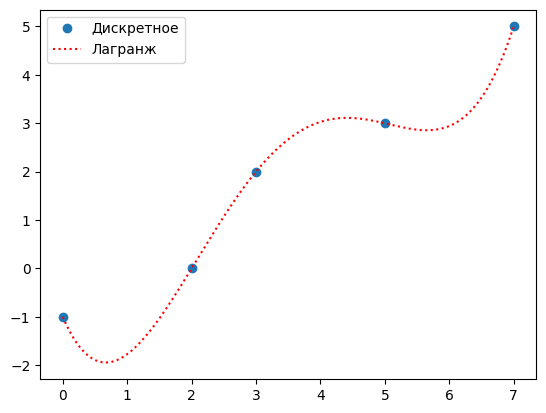

In [29]:
def lagrange(x, x_val, y_val):
    L = 0
    n = len(x_val)
    for i in range(n):
        l = 1
        for j in range(n):
            if j != i:
                l *= ((x - x_val[j]) / (x_val[i] - x_val[j]))
        L += y_val[i] * l
    return L


x_val = [0, 2, 3, 5, 7]
y_val = [-1, 0, 2, 3, 5]
xl = np.linspace(0, 7, 1000)
yl = [lagrange(x, x_val, y_val) for x in xl]
plt.plot(x_val, y_val, "o", label="Дискретное")
plt.plot(xl, yl, ls=":", c="r", label="Лагранж")
plt.legend()
plt.show()

## Считаем производную

In [30]:
def lagrange_div(x, x_val, y_val):
    L = 0
    n = len(x_val)
    for i in range(n):
        l = 0
        for j in range(n):
            if j != i:
                div_i = 1 / (x_val[i] - x_val[j])
                for k in range(n):
                    if k != i and k != j:
                        div_i *= ((x - x_val[k]) / (x_val[i] - x_val[k]))
                l += div_i
        L += y_val[i] * l
    return L

In [31]:
lagrange_div(3, x_values, y_values)

1.621428571428571

### Таким образом, производная в точке x = 3, вычисленная с помощью полинома Лагранжа, равна 1.621428571428571

## 2. Полином Ньютона

Этот метод основан на разделённых разностях и позволяет поэтапно строить многочлен, добавляя новые точки.

$$
P_n(x) = \sum_{k=0}^{n} f[x_0, x_1, \ldots, x_k] \prod_{j=0}^{k-1} (x - x_j)
$$

где $\( f[x_0, x_1, \ldots, x_k] \)$ — это разделённые разности, вычисляемые рекурсивно.

Полином строится поэтапно:

- Первый член — константа $\( f[x_0] \)$
- Следующий член — линейный: $\( f[x_0, x_1] (x - x_0) \)$
- Следующий член — квадратный: $\( f[x_0, x_1, x_2] (x - x_0) (x - x_1) \)$
- И так далее.

### Разделённые разности

Разделённые разности $\( f[x_0, x_1, \ldots, x_k] \)$ определяются следующим образом:

Базовый случай (нулевой порядок):

$$
f[x_i] = f(x_i)
$$

Для $\( k \)$-го порядка:

$$
f[x_0, x_1, \ldots, x_k] = \frac{f[x_1, x_2, \ldots, x_k] - f[x_0, x_1, \ldots, x_{k-1}]}{x_k - x_0}
$$

### Нахождение производной полинома Ньютона

Для производной полинома Ньютона $\( P'_n(x) \)$ дифференцируем каждое слагаемое по очереди:

$$
P'_n(x) = \frac{d}{dx} \left( f[x_0] + f[x_0, x_1] (x - x_0) + f[x_0, x_1, x_2] (x - x_0) (x - x_1) + \ldots \right)
$$

$$
\frac{d}{dx} \left( f[x_0, x_1, \ldots, x_k] (x - x_0) (x - x_1) \ldots (x - x_{k-1}) \right) = f[x_0, x_1, \ldots, x_k] \cdot \frac{d}{dx} \prod_{j=0}^{k-1} (x - x_j)
$$

Производная для каждого множителя зависит от порядка $\( k \)$, а сами коэффициенты $\( f[x_0, x_1, \ldots, x_k] \)$ остаются неизменными.

## Вычисление разделенных разностей

Разделенные разности первого порядка:

$$
f[x_0, x_1] = \frac{0 - (-1)}{2 - 0} = \frac{1}{2} = 0.5
$$

$$
f[x_1, x_2] = \frac{2 - 0}{3 - 2} = \frac{2}{1} = 2
$$

$$
f[x_2, x_3] = \frac{3 - 2}{5 - 3} = \frac{1}{2} = 0.5
$$

$$
f[x_3, x_4] = \frac{5 - 3}{7 - 5} = \frac{2}{2} = 1
$$

Разделенные разности второго порядка:

$$
f[x_0, x_1, x_2] = \frac{f[x_1, x_2] - f[x_0, x_1]}{3 - 0} = \frac{2 - 0.5}{3} = \frac{1.5}{3} = 0.5
$$

$$
f[x_1, x_2, x_3] = \frac{f[x_2, x_3] - f[x_1, x_2]}{5 - 2} = \frac{0.5 - 2}{3} = \frac{-1.5}{3} = -0.5
$$

$$
f[x_2, x_3, x_4] = \frac{f[x_3, x_4] - f[x_2, x_3]}{7 - 3} = \frac{1 - 0.5}{4} = \frac{0.5}{4} = 0.125
$$

Разделенные разности третьего порядка:

$$
f[x_0, x_1, x_2, x_3] = \frac{f[x_1, x_2, x_3] - f[x_0, x_1, x_2]}{5 - 0} = \frac{-0.5 - 0.5}{5} = \frac{-1}{5} = -0.2
$$

$$
f[x_1, x_2, x_3, x_4] = \frac{f[x_2, x_3, x_4] - f[x_1, x_2, x_3]}{7 - 2} = \frac{0.125 - (-0.5)}{5} = \frac{0.625}{5} = 0.125
$$

Разделенные разности четвертого порядка:

$$
f[x_0, x_1, x_2, x_3, x_4] = \frac{f[x_1, x_2, x_3, x_4] - f[x_0, x_1, x_2, x_3]}{7 - 0} = \frac{0.125 - (-0.2)}{7} = \frac{0.325}{7} \approx 0.0464
$$


In [32]:
def newton_interpolation_coefficients(x_val, y_val):
    n = len(x_val)
    divided_differences = np.zeros((n, n))
    divided_differences[:, 0] = y_val

    for j in range(1, n):
        for i in range(n - j):
            divided_differences[i, j] = (divided_differences[i + 1, j - 1] - divided_differences[i, j - 1]) / (x_val[i + j] - x_val[i])

    return divided_differences[0]


def newton_interpolation(x, x_val, coef):
    n = len(coef)
    result = coef[0]
    product = 1

    for i in range(1, n):
        product *= (x - x_val[i - 1])
        result += coef[i] * product

    return result


def newton_interpolation_derivative(x, x_val, coef):
    n = len(coef)
    derivative = 0
    product = 1

    for i in range(1, n):
        term_derivative = coef[i] * i
        product_derivative = 0

        for j in range(i):
            product_inner = 1
            for k in range(i):
                if k != j:
                    product_inner *= (x - x_val[k])
            product_derivative += product_inner

        derivative += term_derivative * product_derivative / i

    return derivative

## График функции

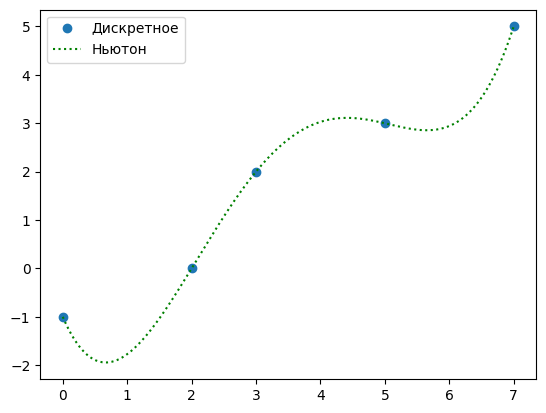

In [33]:
x_val = [0, 2, 3, 5, 7]
y_val = [-1, 0, 2, 3, 5]
xn = np.linspace(0, 7, 1000)
yn = [newton_interpolation(x, x_val, coef) for x in xn]
plt.plot(x_val, y_val, "o", label="Дискретное")
plt.plot(xn, yn, ls=":", c="g", label="Ньютон")
plt.legend()
plt.show()

## Считаем производную

In [34]:
coef = newton_interpolation_coefficients(x_values, y_values)

newton_derivative = newton_interpolation_derivative(3, x_values, coef)
print(f"Производная полинома Ньютона в точке x={3}: {newton_derivative}")

Производная полинома Ньютона в точке x=3: 1.6214285714285714


### Таким образом, производная в точке x = 3, вычисленная с помощью полинома Ньютона, равна 1.6214285714285714

## 3. Вывод
С помощью как интерполяционного многочлена Лагранжа, так и интерполяционного многочлена Ньютона, я получил достаточно точные графики, основанные на табличных данных. Также я получил значение производной в заданной точке с большой точностью. Оба метода показали хорошие результаты